In [1]:
import os
import math
#import graphviz

import sklearn.metrics as metrics
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn

from numpy import load
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import f1_score
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

from xgboost import XGBClassifier

from sklearn.impute import KNNImputer

from sklearn.svm import SVC

%matplotlib inline
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

rd_seed = 333

## Načtení dat

In [2]:
path_file = os.sep.join(['created_data', 'matrix_bak_2015.csv'])
matrix_bak_2015 = pd.read_csv(path_file, sep=",")

## Info o datasetu

In [3]:
matrix_bak_2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4081 entries, 0 to 4080
Data columns (total 33 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   studium_id              4081 non-null   int64  
 1   pohlavi_kod             4081 non-null   int64  
 2   je_cech                 4081 non-null   int64  
 3   datum_zahajeni          4081 non-null   int64  
 4   rok_maturity            4081 non-null   int64  
 5   maturita_nastup_rozdil  4081 non-null   int64  
 6   gymnazium               4081 non-null   int64  
 7   praha                   4081 non-null   int64  
 8   scio                    4081 non-null   int64  
 9   olym                    4081 non-null   int64  
 10  zkouska                 4081 non-null   int64  
 11  prominuti               4081 non-null   int64  
 12  dostudoval_uspesne      4081 non-null   int64  
 13  BI-PA1                  3918 non-null   float64
 14  BI-PAI                  3894 non-null   

In [4]:
matrix_bak_2015.mean()

studium_id                1.467385e+07
pohlavi_kod               1.261946e-01
je_cech                   7.757902e-01
datum_zahajeni            2.017257e+03
rok_maturity              2.016399e+03
maturita_nastup_rozdil    8.576329e-01
gymnazium                 5.449645e-01
praha                     6.508209e-01
scio                      9.605489e-02
olym                      1.021808e-01
zkouska                   3.479539e-02
prominuti                 2.719922e-02
dostudoval_uspesne        2.038716e-01
BI-PA1                    3.201506e+00
BI-PAI                    2.756292e+00
BI-CAO                    1.959115e+00
BI-PS1                    3.093703e+00
BI-MLO                    2.988975e+00
BI-ZMA                    3.206211e+00
BI-PA2                    2.968569e+00
BI-DBS                    2.548092e+00
BI-SAP                    2.444016e+00
BI-LIN                    3.248950e+00
BI-AG1                    2.840164e+00
BI-AAG                    2.787430e+00
BI-ZDM                   

## Příprava datasetu

### Nastavení indexu

In [5]:
matrix_bak_2015 = matrix_bak_2015.set_index(['studium_id'])

### Odstranění příznaků

In [6]:
matrix_bak_2015 = matrix_bak_2015.drop(columns=['BI-DPR', 'pohlavi_kod', 'je_cech', 
                                                'prominuti', 'zkouska', 'olym', 
                                               'scio', 'praha', 'gymnazium', 'datum_zahajeni', 'rok_maturity'])

### Přidání příznaků

In [7]:
matrix_bak_2015['prumer'] = matrix_bak_2015.loc[:, 'BI-PA1':'BI-EMP'].mean(axis=1)

In [8]:
matrix_bak_2015.mean()

maturita_nastup_rozdil    0.857633
dostudoval_uspesne        0.203872
BI-PA1                    3.201506
BI-PAI                    2.756292
BI-CAO                    1.959115
BI-PS1                    3.093703
BI-MLO                    2.988975
BI-ZMA                    3.206211
BI-PA2                    2.968569
BI-DBS                    2.548092
BI-SAP                    2.444016
BI-LIN                    3.248950
BI-AG1                    2.840164
BI-AAG                    2.787430
BI-ZDM                    2.900637
BI-OSY                    2.687002
BI-PSI                    2.627458
BI-BEZ                    2.512070
BI-PST                    2.375468
BI-SI1.2                  2.185497
BI-EMP                    1.817234
prumer                    3.068577
dtype: float64

### Doplnění NaN hodnot

##### Doplnění pomocí KNNImputer

In [9]:
imputer = KNNImputer(n_neighbors=5, weights='distance')
matrix_bak_2015 = pd.DataFrame(imputer.fit_transform(matrix_bak_2015), index=matrix_bak_2015.index, columns=matrix_bak_2015.columns)

In [10]:
matrix_bak_2015.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4081 entries, 19374606 to 11740806
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   maturita_nastup_rozdil  4081 non-null   float64
 1   dostudoval_uspesne      4081 non-null   float64
 2   BI-PA1                  4081 non-null   float64
 3   BI-PAI                  4081 non-null   float64
 4   BI-CAO                  4081 non-null   float64
 5   BI-PS1                  4081 non-null   float64
 6   BI-MLO                  4081 non-null   float64
 7   BI-ZMA                  4081 non-null   float64
 8   BI-PA2                  4081 non-null   float64
 9   BI-DBS                  4081 non-null   float64
 10  BI-SAP                  4081 non-null   float64
 11  BI-LIN                  4081 non-null   float64
 12  BI-AG1                  4081 non-null   float64
 13  BI-AAG                  4081 non-null   float64
 14  BI-ZDM                  4081 

#### Zaokrouhlení doplněných hodnot

In [11]:
grades = [1, 1.5, 2, 2.5, 3, 4]

In [12]:
def custom_round(value):
    return min(grades, key=lambda x:abs(x-value))

In [13]:
matrix_bak_2015.loc[:, 'BI-PA1':'BI-EMP'] = matrix_bak_2015.loc[:, 'BI-PA1':'BI-EMP'].applymap(custom_round)

In [14]:
matrix_bak_2015

maturita_nastup_rozdil  dostudoval_uspesne  BI-PA1  BI-PAI  \
studium_id                                                               
19374606                      12.0                 0.0     4.0     4.0   
12375406                       6.0                 1.0     2.5     2.0   
11736906                       6.0                 0.0     4.0     4.0   
12032306                       8.0                 0.0     4.0     4.0   
15613006                       9.0                 0.0     1.0     2.5   
12948006                       6.0                 1.0     3.0     2.0   
11703806                       5.0                 0.0     1.0     2.5   
12967806                       6.0                 1.0     1.0     2.5   
11738606                       5.0                 0.0     1.0     1.0   
11719706                       5.0                 1.0     1.0     2.5   
11675306                       5.0                 0.0     4.0     4.0   
12987806                       6.0                 0.0     2.5     2.5   
11743906                       5.0                 0.0     2.5     2.5   
13016006                       6.0                 1.0     1.0     3.0   
12036006                       5.0                 0.0     2.5     4.0   
13512306                       5.0                 0.0     4.0     2.0   
12987706                       6.0                 0.0     1.5     1.5   
11678106                       5.0                 0.0     1.5     1.5   
13518506                       5.0                 1.0     1.5     2.0   
14256606                       6.0                 1.0     1.0     2.5   
11727206                       4.0                 1.0     1.0     2.5   
11736306                       4.0                 0.0     1.5     2.0   
12967906                       5.0                 0.0     1.5     2.0   
11703506                       4.0                 0.0     1.5     1.5   
13010106                       5.0                 0.0     2.5     2.0   
14800306                       6.0                 0.0     2.5     2.0   
11744706                       4.0                 0.0     4.0     2.5   
11696406                       5.0                 0.0     4.0     2.5   
12973406                       5.0                 1.0     2.5     2.5   
11737806                       4.0                 0.0     4.0     4.0   
12035506                       4.0                 0.0     2.0     2.5   
13512006                       5.0                 1.0     1.0     1.5   
12964406                       5.0                 0.0     2.0     2.0   
12994106                       5.0                 1.0     2.0     2.5   
11742506                       4.0                 1.0     2.0     2.0   
11712706                       4.0                 0.0     1.0     1.0   
13518806                       5.0                 0.0     1.0     1.5   
11735606                       4.0                 0.0     2.0     3.0   
13518606                       5.0                 1.0     2.0     2.5   
15586306                       7.0                 1.0     2.5     1.5   
13519806                       5.0                 0.0     2.5     1.5   
11686106                       3.0                 1.0     2.5     2.5   
11692606                       3.0                 0.0     4.0     4.0   
13013306                       4.0                 1.0     1.5     1.5   
11713906                       3.0                 0.0     1.5     3.0   
12978506                       4.0                 1.0     2.0     2.5   
14283706                       5.0                 1.0     2.0     2.0   
11736706                       3.0                 0.0     2.5     2.5   
11676006                       3.0                 0.0     2.5     2.5   
12033706                       3.0                 1.0     1.5     2.0   
12964506                       4.0                 0.0     2.0     2.0   
16724706                       7.0                 0.0     2.5     1.5   
12954706        

### Pomocné promenné

In [15]:
# predmety podle doporuceneho semestru
courses_1 = ['BI-PA1', 'BI-PAI', 'BI-CAO', 'BI-PS1', 'BI-MLO', 'BI-ZMA']
courses_2 = ['BI-PA2', 'BI-DBS', 'BI-SAP', 'BI-LIN']
courses_3 = ['BI-AAG', 'BI-ZDM', 'BI-AG1']
courses_4 = ['BI-OSY', 'BI-PSI', 'BI-BEZ']
courses_5 = ['BI-PST']
courses_6 = []
courses_7 = ['BI-SI1.2', 'BI-EMP']

courses = courses_1 + courses_2 + courses_3 + courses_4 + courses_5 + courses_6 + courses_7

In [16]:
means = {'BI-PA1':3, 'BI-PAI':3, 'BI-CAO':2, 'BI-PS1':3, 'BI-MLO':3, 'BI-ZMA':3,
        'BI-PA2':3, 'BI-DBS':2.5, 'BI-SAP':2.5, 'BI-LIN':3,
        'BI-AAG':3, 'BI-ZDM':3, 'BI-AG1':3,
        'BI-OSY':2.5, 'BI-PSI':2.5, 'BI-BEZ':2.5,
        'BI-PST':2,
        'BI-SI1.2':2, 'BI-EMP':2
        }

prumer_mean = 3

### Nastavení target proměnné na nominální

In [17]:
dostudoval_uspesne_category = pd.api.types.CategoricalDtype(categories=[0, 1], ordered=False)
matrix_bak_2015['dostudoval_uspesne'] = matrix_bak_2015['dostudoval_uspesne'].astype(dostudoval_uspesne_category)

In [18]:
matrix_bak_2015.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4081 entries, 19374606 to 11740806
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   maturita_nastup_rozdil  4081 non-null   float64 
 1   dostudoval_uspesne      4081 non-null   category
 2   BI-PA1                  4081 non-null   float64 
 3   BI-PAI                  4081 non-null   float64 
 4   BI-CAO                  4081 non-null   float64 
 5   BI-PS1                  4081 non-null   float64 
 6   BI-MLO                  4081 non-null   float64 
 7   BI-ZMA                  4081 non-null   float64 
 8   BI-PA2                  4081 non-null   float64 
 9   BI-DBS                  4081 non-null   float64 
 10  BI-SAP                  4081 non-null   float64 
 11  BI-LIN                  4081 non-null   float64 
 12  BI-AG1                  4081 non-null   float64 
 13  BI-AAG                  4081 non-null   float64 
 14  BI-ZDM       

### Nastavení atributů na kategorické - ordinální

In [19]:
# ordinální
grades_category = pd.api.types.CategoricalDtype(categories=[1, 1.5, 2, 2.5, 3, 4, 0], ordered=True)
# BI-PA1
matrix_bak_2015['BI-PA1'] = matrix_bak_2015['BI-PA1'].astype(grades_category)
# BI-PAI
matrix_bak_2015['BI-PAI'] = matrix_bak_2015['BI-PAI'].astype(grades_category)
# BI-CAO
matrix_bak_2015['BI-CAO'] = matrix_bak_2015['BI-CAO'].astype(grades_category)
# BI-PS1
matrix_bak_2015['BI-PS1'] = matrix_bak_2015['BI-PS1'].astype(grades_category)
# BI-MLO
matrix_bak_2015['BI-MLO'] = matrix_bak_2015['BI-MLO'].astype(grades_category)
# BI-ZMA
matrix_bak_2015['BI-ZMA'] = matrix_bak_2015['BI-ZMA'].astype(grades_category)
# BI-PA2
matrix_bak_2015['BI-PA2'] = matrix_bak_2015['BI-PA2'].astype(grades_category)
# BI-DBS
matrix_bak_2015['BI-DBS'] = matrix_bak_2015['BI-DBS'].astype(grades_category)
# BI-SAP
matrix_bak_2015['BI-SAP'] = matrix_bak_2015['BI-SAP'].astype(grades_category)
# BI-LIN
matrix_bak_2015['BI-LIN'] = matrix_bak_2015['BI-LIN'].astype(grades_category)
# BI-AG1
matrix_bak_2015['BI-AG1'] = matrix_bak_2015['BI-AG1'].astype(grades_category)
# BI-AAG
matrix_bak_2015['BI-AAG'] = matrix_bak_2015['BI-AAG'].astype(grades_category)
# BI-ZDM
matrix_bak_2015['BI-ZDM'] = matrix_bak_2015['BI-ZDM'].astype(grades_category)
# BI-OSY
matrix_bak_2015['BI-OSY'] = matrix_bak_2015['BI-OSY'].astype(grades_category)
# BI-PSI
matrix_bak_2015['BI-PSI'] = matrix_bak_2015['BI-PSI'].astype(grades_category)
# BI-BEZ
matrix_bak_2015['BI-BEZ'] = matrix_bak_2015['BI-BEZ'].astype(grades_category)
# BI-PST
matrix_bak_2015['BI-PST'] = matrix_bak_2015['BI-PST'].astype(grades_category)
# BI-SI1.2
matrix_bak_2015['BI-SI1.2'] = matrix_bak_2015['BI-SI1.2'].astype(grades_category)
# BI-MLO
matrix_bak_2015['BI-EMP'] = matrix_bak_2015['BI-EMP'].astype(grades_category)

In [20]:
matrix_bak_2015.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4081 entries, 19374606 to 11740806
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   maturita_nastup_rozdil  4081 non-null   float64 
 1   dostudoval_uspesne      4081 non-null   category
 2   BI-PA1                  4081 non-null   category
 3   BI-PAI                  4081 non-null   category
 4   BI-CAO                  4081 non-null   category
 5   BI-PS1                  4081 non-null   category
 6   BI-MLO                  4081 non-null   category
 7   BI-ZMA                  4081 non-null   category
 8   BI-PA2                  4081 non-null   category
 9   BI-DBS                  4081 non-null   category
 10  BI-SAP                  4081 non-null   category
 11  BI-LIN                  4081 non-null   category
 12  BI-AG1                  4081 non-null   category
 13  BI-AAG                  4081 non-null   category
 14  BI-ZDM       

## Modelování

### Bakalář všechny pp

#### Rozdělení datasetu

In [21]:
Xdata = matrix_bak_2015.drop(columns='dostudoval_uspesne')
ydata = matrix_bak_2015.dostudoval_uspesne

In [22]:
Xtrain, Xtest, ytrain, ytest = train_test_split(Xdata, ydata, test_size=0.2, random_state=rd_seed, stratify=ydata, shuffle=True) 
print("původní data")
display(Xdata.shape)
display(ydata.shape)
print("trénovací data")
display(Xtrain.shape)
display(ytrain.shape)
print("testovací data")
display(Xtest.shape)
display(ytest.shape)

původní data


(4081, 21)

(4081,)

trénovací data


(3264, 21)

(3264,)

testovací data


(817, 21)

(817,)

#### Funkce pro vybrání vhodných hyperparametrů pomocí křížové validace

In [23]:
def get_best_parameters(param_grid, classifier, xgb=None):
    score = 'f1'
    if xgb:
        model = GridSearchCV(classifier(eval_metric='mlogloss', use_label_encoder=False, tree_method="gpu_hist", enable_categorical=True), param_grid, cv=5, scoring=score)
    else:
        model = GridSearchCV(classifier(), param_grid, cv=5, scoring=score)
    model.fit(Xtrain, ytrain)

    print('Best hyper-parameters are: ')
    print(model.best_params_)
    print()

    means = model.cv_results_["mean_test_score"]
    stds = model.cv_results_["std_test_score"]
    for mean, std, params in zip(means, stds, model.cv_results_["params"]):
        print("%0.6f (+/-%0.06f) for %r" % (mean, std * 2, params))
    print()
    return model

#### Rozhodovací strom

In [24]:
param_grid = [
    {'criterion':['gini','entropy'],
    'max_depth': range(2,7),
    'min_samples_leaf':[10]}
]

In [25]:
dt_f1 = get_best_parameters(param_grid, DecisionTreeClassifier)

Best hyper-parameters are: 
{'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 10}

0.899501 (+/-0.021695) for {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 10}
0.904940 (+/-0.020994) for {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 10}
0.916110 (+/-0.015393) for {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 10}
0.910294 (+/-0.030331) for {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 10}
0.911539 (+/-0.030341) for {'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 10}
0.894626 (+/-0.028304) for {'criterion': 'entropy', 'max_depth': 2, 'min_samples_leaf': 10}
0.908513 (+/-0.040817) for {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 10}
0.918637 (+/-0.021133) for {'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 10}
0.923335 (+/-0.018144) for {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 10}
0.924339 (+/-0.032127) for {'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 10}



In [26]:
print('accuracy score (train): {0:.6f}'.format(metrics.accuracy_score(ytrain, dt_f1.predict(Xtrain))))
print('accuracy score (test): {0:.6f}'.format(metrics.accuracy_score(ytest, dt_f1.predict(Xtest))))

accuracy score (train): 0.977941
accuracy score (test): 0.975520


In [27]:
feature_importances=pd.DataFrame({'features':Xtrain.columns,'feature_importance':dt_f1.best_estimator_.feature_importances_})
feature_importances.sort_values('feature_importance',ascending=False)

features  feature_importance
11                  BI-AG1            0.757592
10                  BI-LIN            0.101627
7                   BI-PA2            0.050039
0   maturita_nastup_rozdil            0.037625
13                  BI-ZDM            0.023422
19                  BI-EMP            0.013466
20                  prumer            0.008154
17                  BI-PST            0.008075
18                BI-SI1.2            0.000000
16                  BI-BEZ            0.000000
15                  BI-PSI            0.000000
14                  BI-OSY            0.000000
4                   BI-PS1            0.000000
5                   BI-MLO            0.000000
2                   BI-PAI            0.000000
1                   BI-PA1            0.000000
9                   BI-SAP            0.000000
8                   BI-DBS            0.000000
3                   BI-CAO            0.000000
6                   BI-ZMA            0.000000
12                  BI-AAG            0.000000

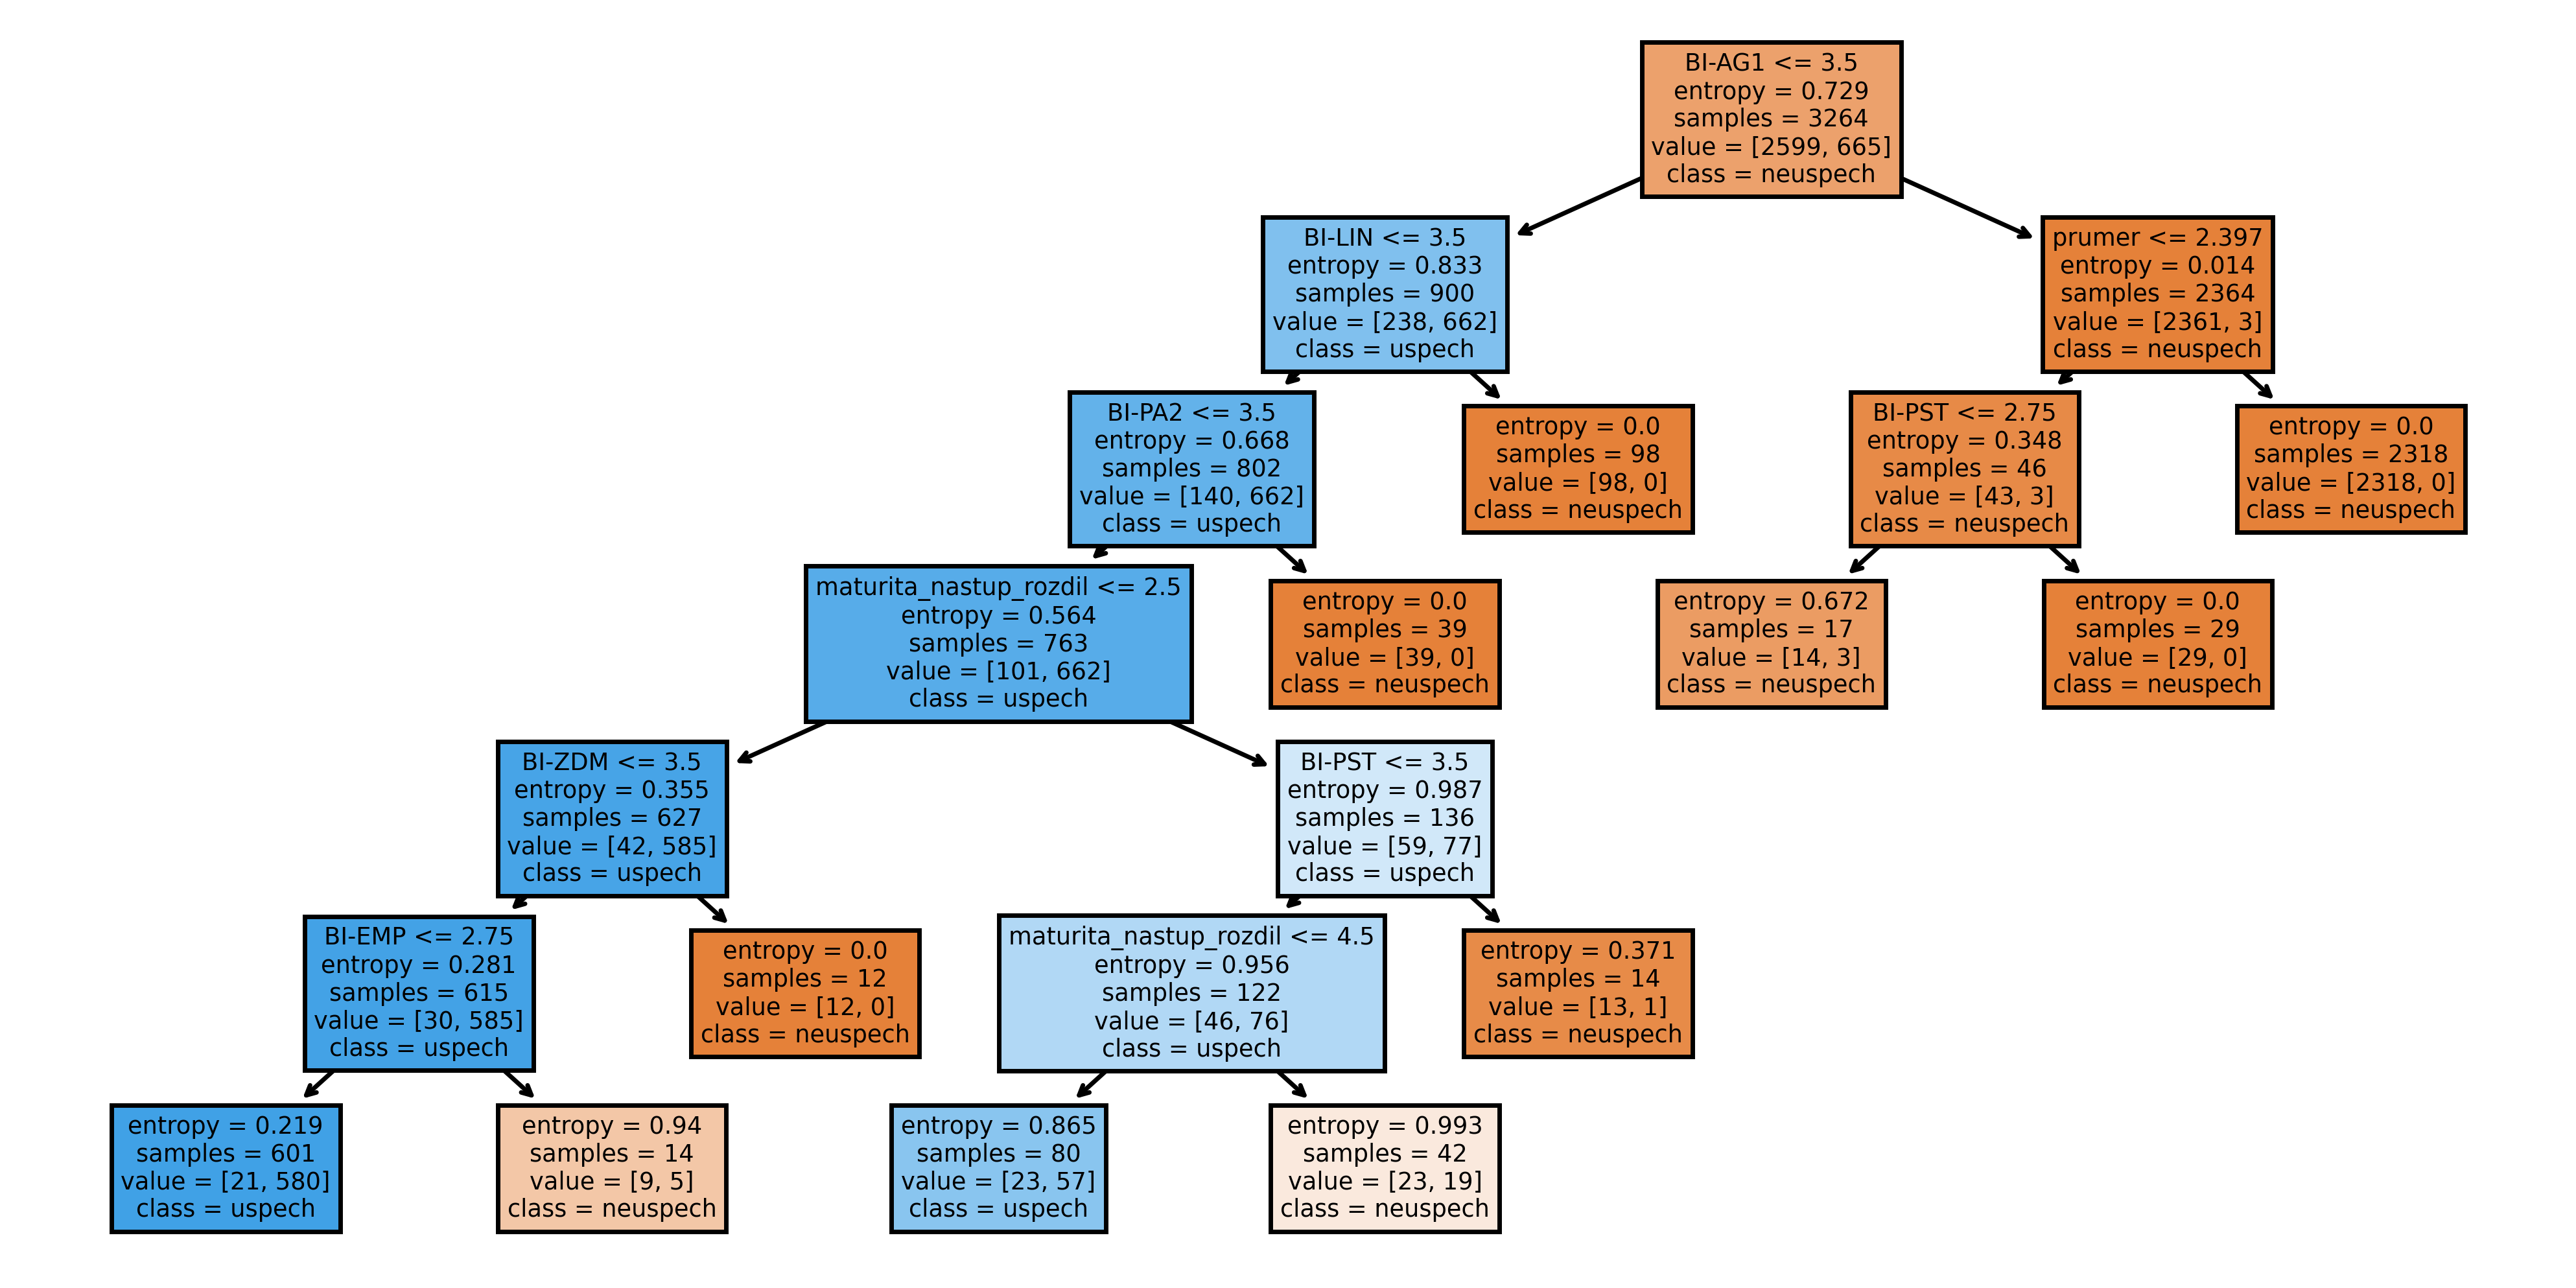

In [28]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10,5), dpi=500)
tree.plot_tree(dt_f1.best_estimator_,
               feature_names = Xdata.columns, 
               class_names=['neuspech', 'uspech'],
               filled = True);
fig.savefig('tree_f1.png')

#### Random forest

In [29]:
param_grid_rf = {
    'criterion':['gini','entropy'],
    'n_estimators': range(5, 50, 5),
    'max_depth': range(2, 4),
    'max_features': ['sqrt', 'log2', None],
    'min_samples_leaf':[10]
}

In [30]:
rf_f1 = get_best_parameters(param_grid_rf, RandomForestClassifier)

Best hyper-parameters are: 
{'criterion': 'entropy', 'max_depth': 3, 'max_features': 'log2', 'min_samples_leaf': 10, 'n_estimators': 45}

0.906333 (+/-0.036870) for {'criterion': 'gini', 'max_depth': 2, 'max_features': 'sqrt', 'min_samples_leaf': 10, 'n_estimators': 5}
0.918434 (+/-0.030413) for {'criterion': 'gini', 'max_depth': 2, 'max_features': 'sqrt', 'min_samples_leaf': 10, 'n_estimators': 10}
0.921802 (+/-0.019128) for {'criterion': 'gini', 'max_depth': 2, 'max_features': 'sqrt', 'min_samples_leaf': 10, 'n_estimators': 15}
0.922449 (+/-0.009095) for {'criterion': 'gini', 'max_depth': 2, 'max_features': 'sqrt', 'min_samples_leaf': 10, 'n_estimators': 20}
0.924667 (+/-0.026594) for {'criterion': 'gini', 'max_depth': 2, 'max_features': 'sqrt', 'min_samples_leaf': 10, 'n_estimators': 25}
0.921963 (+/-0.023775) for {'criterion': 'gini', 'max_depth': 2, 'max_features': 'sqrt', 'min_samples_leaf': 10, 'n_estimators': 30}
0.917969 (+/-0.018173) for {'criterion': 'gini', 'max_depth': 2, 

In [31]:
print('accuracy score (train): {0:.6f}'.format(metrics.accuracy_score(ytrain, rf_f1.predict(Xtrain))))
print('accuracy score (test): {0:.6f}'.format(metrics.accuracy_score(ytest, rf_f1.predict(Xtest))))

accuracy score (train): 0.972733
accuracy score (test): 0.974296


In [32]:
feature_importances=pd.DataFrame({'features':Xtrain.columns,'feature_importance':rf_f1.best_estimator_.feature_importances_})
feature_importances.sort_values('feature_importance',ascending=False)

features  feature_importance
11                  BI-AG1            0.266586
20                  prumer            0.161887
12                  BI-AAG            0.155997
7                   BI-PA2            0.117404
13                  BI-ZDM            0.104785
10                  BI-LIN            0.078639
14                  BI-OSY            0.032191
16                  BI-BEZ            0.019749
17                  BI-PST            0.019081
15                  BI-PSI            0.017143
19                  BI-EMP            0.013945
6                   BI-ZMA            0.006312
1                   BI-PA1            0.003496
0   maturita_nastup_rozdil            0.001816
3                   BI-CAO            0.000818
18                BI-SI1.2            0.000070
8                   BI-DBS            0.000060
2                   BI-PAI            0.000023
5                   BI-MLO            0.000000
9                   BI-SAP            0.000000
4                   BI-PS1            0.000000

#### SVM

In [33]:
param_grid_svm = {
    'kernel':['linear', 'rbf'],
    'gamma':['auto', 'scale'],
    'C':[100, 10, 1, 0.1]
}
param_comb_svm = ParameterGrid(param_grid_svm)

In [34]:
svc_f1 = get_best_parameters(param_grid_svm, SVC)

Best hyper-parameters are: 
{'C': 1, 'gamma': 'auto', 'kernel': 'rbf'}

0.927005 (+/-0.030628) for {'C': 100, 'gamma': 'auto', 'kernel': 'linear'}
0.931794 (+/-0.030289) for {'C': 100, 'gamma': 'auto', 'kernel': 'rbf'}
0.927005 (+/-0.030628) for {'C': 100, 'gamma': 'scale', 'kernel': 'linear'}
0.936472 (+/-0.031246) for {'C': 100, 'gamma': 'scale', 'kernel': 'rbf'}
0.927776 (+/-0.028328) for {'C': 10, 'gamma': 'auto', 'kernel': 'linear'}
0.944762 (+/-0.027321) for {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}
0.927776 (+/-0.028328) for {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}
0.942813 (+/-0.028033) for {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
0.929361 (+/-0.026830) for {'C': 1, 'gamma': 'auto', 'kernel': 'linear'}
0.947737 (+/-0.025230) for {'C': 1, 'gamma': 'auto', 'kernel': 'rbf'}
0.929361 (+/-0.026830) for {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
0.946930 (+/-0.021587) for {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
0.929620 (+/-0.031914) for {'C': 0.1, 'gamma': 'auto

In [35]:
print('accuracy score (train): {0:.6f}'.format(metrics.accuracy_score(ytrain, svc_f1.predict(Xtrain))))
print('accuracy score (test): {0:.6f}'.format(metrics.accuracy_score(ytest, svc_f1.predict(Xtest))))

accuracy score (train): 0.983150
accuracy score (test): 0.976744


#### Adaboost

In [36]:
param_grid_ab = {
    'n_estimators': range(5, 50, 5),
    'learning_rate': np.arange(0.1, 1., 0.1)
}

In [37]:
ab_f1 = get_best_parameters(param_grid_ab, AdaBoostClassifier)

Best hyper-parameters are: 
{'learning_rate': 0.1, 'n_estimators': 45}

0.898255 (+/-0.021514) for {'learning_rate': 0.1, 'n_estimators': 5}
0.929883 (+/-0.012142) for {'learning_rate': 0.1, 'n_estimators': 10}
0.934974 (+/-0.016781) for {'learning_rate': 0.1, 'n_estimators': 15}
0.944024 (+/-0.022199) for {'learning_rate': 0.1, 'n_estimators': 20}
0.946771 (+/-0.016499) for {'learning_rate': 0.1, 'n_estimators': 25}
0.946712 (+/-0.018110) for {'learning_rate': 0.1, 'n_estimators': 30}
0.952968 (+/-0.020203) for {'learning_rate': 0.1, 'n_estimators': 35}
0.954147 (+/-0.016402) for {'learning_rate': 0.1, 'n_estimators': 40}
0.957230 (+/-0.015047) for {'learning_rate': 0.1, 'n_estimators': 45}
0.914507 (+/-0.008197) for {'learning_rate': 0.2, 'n_estimators': 5}
0.930320 (+/-0.023435) for {'learning_rate': 0.2, 'n_estimators': 10}
0.936693 (+/-0.021613) for {'learning_rate': 0.2, 'n_estimators': 15}
0.944534 (+/-0.015201) for {'learning_rate': 0.2, 'n_estimators': 20}
0.950965 (+/-0.02591

In [38]:
print('accuracy score (train): {0:.6f}'.format(metrics.accuracy_score(ytrain, ab_f1.predict(Xtrain))))
print('accuracy score (test): {0:.6f}'.format(metrics.accuracy_score(ytest, ab_f1.predict(Xtest))))

accuracy score (train): 0.984069
accuracy score (test): 0.982864


In [39]:
feature_importances=pd.DataFrame({'features':Xtrain.columns,'feature_importance':ab_f1.best_estimator_.feature_importances_})
feature_importances.sort_values('feature_importance',ascending=False)

features  feature_importance
0   maturita_nastup_rozdil            0.355556
17                  BI-PST            0.155556
19                  BI-EMP            0.088889
13                  BI-ZDM            0.088889
11                  BI-AG1            0.088889
8                   BI-DBS            0.044444
20                  prumer            0.044444
7                   BI-PA2            0.022222
1                   BI-PA1            0.022222
12                  BI-AAG            0.022222
14                  BI-OSY            0.022222
15                  BI-PSI            0.022222
10                  BI-LIN            0.022222
6                   BI-ZMA            0.000000
9                   BI-SAP            0.000000
5                   BI-MLO            0.000000
4                   BI-PS1            0.000000
16                  BI-BEZ            0.000000
3                   BI-CAO            0.000000
18                BI-SI1.2            0.000000
2                   BI-PAI            0.000000

#### Xgboost

In [40]:
param_grid = {
    'eta': np.arange(0.1, 1., 0.1),
    'max_depth': range(3, 8)
}
param_comb = ParameterGrid(param_grid)

In [41]:
xgb_f1 = get_best_parameters(param_grid, XGBClassifier, True)

Best hyper-parameters are: 
{'eta': 0.1, 'max_depth': 4}

0.951425 (+/-0.019886) for {'eta': 0.1, 'max_depth': 3}
0.954613 (+/-0.018070) for {'eta': 0.1, 'max_depth': 4}
0.952348 (+/-0.016792) for {'eta': 0.1, 'max_depth': 5}
0.949282 (+/-0.012908) for {'eta': 0.1, 'max_depth': 6}
0.946945 (+/-0.010553) for {'eta': 0.1, 'max_depth': 7}
0.948184 (+/-0.023003) for {'eta': 0.2, 'max_depth': 3}
0.947896 (+/-0.013260) for {'eta': 0.2, 'max_depth': 4}
0.949436 (+/-0.010411) for {'eta': 0.2, 'max_depth': 5}
0.950670 (+/-0.022534) for {'eta': 0.2, 'max_depth': 6}
0.949279 (+/-0.019724) for {'eta': 0.2, 'max_depth': 7}
0.949296 (+/-0.016084) for {'eta': 0.30000000000000004, 'max_depth': 3}
0.945766 (+/-0.018594) for {'eta': 0.30000000000000004, 'max_depth': 4}
0.947132 (+/-0.013810) for {'eta': 0.30000000000000004, 'max_depth': 5}
0.948427 (+/-0.007969) for {'eta': 0.30000000000000004, 'max_depth': 6}
0.950085 (+/-0.017821) for {'eta': 0.30000000000000004, 'max_depth': 7}
0.948630 (+/-0.015835)

In [42]:
print('accuracy score XGBoost (train): {0:.6f}'.format(metrics.accuracy_score(ytrain, xgb_f1.predict(Xtrain))))
print('accuracy score XGBoost (val): {0:.6f}'.format(metrics.accuracy_score(ytest, xgb_f1.predict(Xtest))))

accuracy score XGBoost (train): 0.990809
accuracy score XGBoost (val): 0.979192


In [43]:
feat_imp = pd.Series(xgb_f1.best_estimator_.get_booster().get_fscore()).sort_values(ascending=False)

In [44]:
feat_imp

BI-ZDM                    47.0
BI-AAG                    44.0
prumer                    42.0
BI-EMP                    41.0
BI-AG1                    41.0
maturita_nastup_rozdil    41.0
BI-PST                    40.0
BI-PA1                    40.0
BI-OSY                    38.0
BI-PA2                    38.0
BI-LIN                    34.0
BI-PSI                    26.0
BI-DBS                    26.0
BI-PS1                    24.0
BI-BEZ                    19.0
BI-ZMA                    18.0
BI-PAI                    16.0
BI-SI1.2                  12.0
BI-SAP                    11.0
BI-MLO                    11.0
BI-CAO                    11.0
dtype: float64

#### MLP

In [45]:
mlp = MLPClassifier(random_state=1, max_iter=500).fit(Xtrain, ytrain)

In [46]:
print('accuracy score mlp (train): {0:.6f}'.format(metrics.accuracy_score(ytrain, mlp.predict(Xtrain))))
print('accuracy score mlp (val): {0:.6f}'.format(metrics.accuracy_score(ytest, mlp.predict(Xtest))))

accuracy score mlp (train): 0.984069
accuracy score mlp (val): 0.969400


#### Lineární regrese

In [47]:
reg = LinearRegression().fit(Xtrain, ytrain)

In [48]:
print('RMSE reg (test):', np.sqrt(mean_squared_error(reg.predict(Xtrain), np.array(ytrain))))
print('RMSE reg (test):', np.sqrt(mean_squared_error(reg.predict(Xtest), np.array(ytest))))

RMSE reg (test): 0.1859892966005736
RMSE reg (test): 0.19777620880660582


#### kNN

In [49]:
param_grid = {
    'n_neighbors' : range(1, 12), # Počet nejbližších sousedů
    'p': range(1, 3), # Stupeň Minkowského vzdálenosti
    'weights': ['uniform', 'distance'], # Aritmetický, nebo vážený průměr
}
param_comb = ParameterGrid(param_grid)

In [50]:
knn = get_best_parameters(param_grid, KNeighborsClassifier)

Best hyper-parameters are: 
{'n_neighbors': 10, 'p': 1, 'weights': 'uniform'}

0.915164 (+/-0.017640) for {'n_neighbors': 1, 'p': 1, 'weights': 'uniform'}
0.915164 (+/-0.017640) for {'n_neighbors': 1, 'p': 1, 'weights': 'distance'}
0.908361 (+/-0.020803) for {'n_neighbors': 1, 'p': 2, 'weights': 'uniform'}
0.908361 (+/-0.020803) for {'n_neighbors': 1, 'p': 2, 'weights': 'distance'}
0.903131 (+/-0.031024) for {'n_neighbors': 2, 'p': 1, 'weights': 'uniform'}
0.913563 (+/-0.018001) for {'n_neighbors': 2, 'p': 1, 'weights': 'distance'}
0.897185 (+/-0.029362) for {'n_neighbors': 2, 'p': 2, 'weights': 'uniform'}
0.908361 (+/-0.020803) for {'n_neighbors': 2, 'p': 2, 'weights': 'distance'}
0.925402 (+/-0.035502) for {'n_neighbors': 3, 'p': 1, 'weights': 'uniform'}
0.925962 (+/-0.036732) for {'n_neighbors': 3, 'p': 1, 'weights': 'distance'}
0.912239 (+/-0.040471) for {'n_neighbors': 3, 'p': 2, 'weights': 'uniform'}
0.912239 (+/-0.040471) for {'n_neighbors': 3, 'p': 2, 'weights': 'distance'}
0.9

In [51]:
print('accuracy score knn (train): {0:.6f}'.format(metrics.accuracy_score(ytrain, knn.predict(Xtrain))))
print('accuracy score knn (val): {0:.6f}'.format(metrics.accuracy_score(ytest, knn.predict(Xtest))))

accuracy score knn (train): 0.972426
accuracy score knn (val): 0.968176


## Testování po semestrech

### Doplnění 0

#### Pouze nepředmětové příznaky

In [52]:
Xtest_0 = Xtest.copy(deep=True)

courses_not_use = courses
for course in courses_not_use:
    Xtest_0.loc[:, course] = 0
Xtest_0.loc[:, 'prumer'] = 5

#### 1. semestr

In [53]:
Xtest_1 = Xtest.copy(deep=True)

courses_not_use = courses_2 + courses_3 + courses_4 + courses_5 + courses_6 + courses_7
for course in courses_not_use:
    Xtest_1.loc[:, course] = 0

Xtest_1.loc[:, 'prumer'] = 5

#### První dva semestry

In [54]:
Xtest_2 = Xtest.copy(deep=True)

courses_not_use = courses_3 + courses_4 + courses_5 + courses_6 + courses_7

for course in courses_not_use:
    Xtest_2.loc[:, course] = 0
    
Xtest_2.loc[:, 'prumer'] = 5

#### První tři semestry

In [55]:
Xtest_3 = Xtest.copy(deep=True)

courses_not_use = courses_4 + courses_5 + courses_6 + courses_7

for course in courses_not_use:
    Xtest_3.loc[:, course] = 0
    
Xtest_3.loc[:, 'prumer'] = 5

#### První čtyři semestry 

In [56]:
Xtest_4 = Xtest.copy(deep=True)

courses_not_use = courses_5 + courses_6 + courses_7

for course in courses_not_use:
    Xtest_4.loc[:, course] = 0
    
Xtest_4.loc[:, 'prumer'] = 5

#### Prvních pět semestrů

In [57]:
Xtest_5 = Xtest.copy(deep=True)

courses_not_use = courses_6 + courses_7

for course in courses_not_use:
    Xtest_5.loc[:, course] = 0
    
Xtest_5.loc[:, 'prumer'] = 5

#### Všechny semestry bez SI1.2 a EMP

In [58]:
Xtest_6 = Xtest.copy(deep=True)

courses_not_use = courses_7

for course in courses_not_use:
    Xtest_6.loc[:, course] = 0
    
Xtest_6.loc[:, 'prumer'] = 5

### Doplnění průměrem

#### Pouze nepředmětové příznaky

In [59]:
Xtest_0_mean = Xtest.copy(deep=True)

courses_not_use = courses
for course in courses_not_use:
    Xtest_0_mean.loc[:, course] = means[course]
Xtest_0_mean.loc[:, 'prumer'] = prumer_mean

#### První semestr

In [60]:
Xtest_1_mean = Xtest.copy(deep=True)

courses_not_use = courses_2 + courses_3 + courses_4 + courses_5 + courses_6 + courses_7
for course in courses_not_use:
    Xtest_1_mean.loc[:, course] = means[course]

Xtest_1_mean['prumer'] = matrix_bak_2015.loc[:, 'BI-PA1':'BI-ZMA'].mean(axis=1)
Xtest_1_mean['prumer'].fillna(prumer_mean, inplace=True)

#### První dva semestry

In [61]:
Xtest_2_mean = Xtest.copy(deep=True)

courses_not_use = courses_3 + courses_4 + courses_5 + courses_6 + courses_7

for course in courses_not_use:
    Xtest_2_mean.loc[:, course] = means[course]
    
Xtest_2_mean['prumer'] = matrix_bak_2015.loc[:, 'BI-PA1':'BI-LIN'].mean(axis=1)
Xtest_2_mean['prumer'].fillna(prumer_mean, inplace=True)

#### První tři semestry

In [62]:
Xtest_3_mean = Xtest.copy(deep=True)

courses_not_use = courses_4 + courses_5 + courses_6 + courses_7

for course in courses_not_use:
    Xtest_3_mean.loc[:, course] = means[course]
    
Xtest_3_mean['prumer'] = matrix_bak_2015.loc[:, 'BI-PA1':'BI-ZDM'].mean(axis=1)
Xtest_3_mean['prumer'].fillna(prumer_mean, inplace=True)

#### První čtyři semestry 

In [63]:
Xtest_4_mean = Xtest.copy(deep=True)

courses_not_use = courses_5 + courses_6 + courses_7

for course in courses_not_use:
    Xtest_4_mean.loc[:, course] = means[course]
    
Xtest_4_mean['prumer'] = matrix_bak_2015.loc[:, 'BI-PA1':'BI-BEZ'].mean(axis=1)
Xtest_4_mean['prumer'].fillna(prumer_mean, inplace=True)

#### Prvních pět semestrů

In [64]:
Xtest_5_mean = Xtest.copy(deep=True)

courses_not_use = courses_6 + courses_7

for course in courses_not_use:
    Xtest_5_mean.loc[:, course] = means[course]
    
Xtest_5_mean['prumer'] = matrix_bak_2015.loc[:, 'BI-PA1':'BI-PST'].mean(axis=1)
Xtest_5_mean['prumer'].fillna(prumer_mean, inplace=True)

#### Všechny semestry bez SI1.2 a EMP

In [65]:
Xtest_6_mean = Xtest.copy(deep=True)

courses_not_use = courses_7

for course in courses_not_use:
    Xtest_6_mean.loc[:, course] = means[course]
    
Xtest_6_mean['prumer'] = matrix_bak_2015.loc[:, 'BI-PA1':'BI-PST'].mean(axis=1)
Xtest_6_mean['prumer'].fillna(prumer_mean, inplace=True)

## Výsledky

In [66]:
results = pd.DataFrame(columns=['dt', 'rf', 'svm', 'ab', 'xgb', 'mlp', 'knn'], index=[0, 1, 2, 3, 4, 5, 6, 7])
results_mean = pd.DataFrame(columns=['dt', 'rf', 'svm', 'ab', 'xgb', 'mlp', 'knn'], index=[0, 1, 2, 3, 4, 5, 6, 7])

results_f1 = pd.DataFrame(columns=['dt', 'rf', 'svm', 'ab', 'xgb', 'mlp', 'knn'], index=[0, 1, 2, 3, 4, 5, 6, 7])
results_mean_f1 = pd.DataFrame(columns=['dt', 'rf', 'svm', 'ab', 'xgb', 'mlp', 'knn'], index=[0, 1, 2, 3, 4, 5, 6, 7])

In [67]:
results_reg = pd.DataFrame(columns=['reg'], index=[0, 1, 2, 3, 4, 5, 6, 7])
results_reg_mean = pd.DataFrame(columns=['reg'], index=[0, 1, 2, 3, 4, 5, 6, 7])

### Linearní regrese měřena pomocí RMSE

#### Doplněno 0

In [68]:
x_test = {0:Xtest_0, 1:Xtest_1, 2:Xtest_2, 3:Xtest_3, 4:Xtest_4, 5:Xtest_5, 6:Xtest_6, 7:Xtest}
for i in range(0, 8):   
    results_reg.loc[i, 'reg'] = round(np.sqrt(mean_squared_error(reg.predict(x_test[i]), np.array(ytest))), 3)

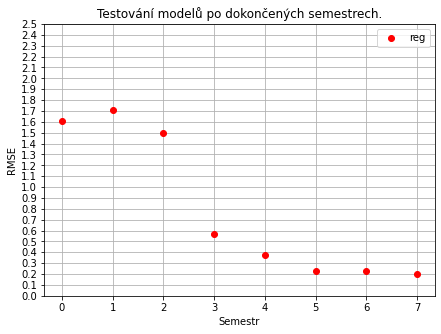

In [69]:
plt.figure(figsize=(7,5))
plt.grid(True)

xreg = results_reg['reg'].index
yreg = results_reg['reg'].values

y_values = np.arange(0.0, 2.55, 0.1)

plt.plot(xreg, yreg, 'o', color='r', label='reg')

plt.title('Testování modelů po dokončených semestrech.')

plt.yticks(y_values)
plt.xlabel('Semestr')
plt.ylabel('RMSE')

plt.legend()

plt.show()

In [70]:
results_reg

reg
0  1.608
1  1.713
2  1.496
3  0.566
4  0.378
5  0.224
6  0.224
7  0.198

#### Doplněno průměrem

In [71]:
x_test_mean = {0:Xtest_0_mean, 1:Xtest_1_mean, 2:Xtest_2_mean, 3:Xtest_3_mean, 4:Xtest_4_mean, 5:Xtest_5_mean, 6:Xtest_6_mean, 7:Xtest}
for i in range(0, 8):
    results_reg_mean.loc[i, 'reg'] = round(np.sqrt(mean_squared_error(reg.predict(x_test_mean[i]), np.array(ytest))), 3)

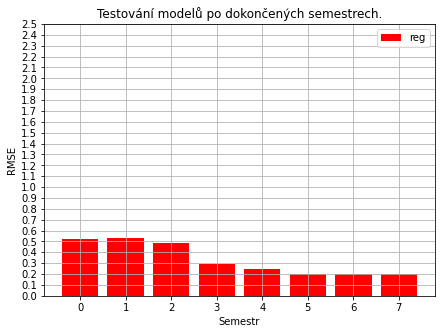

In [72]:
plt.figure(figsize=(7,5))
plt.grid(True)

xreg = results_reg_mean['reg'].index
yreg = results_reg_mean['reg'].values

y_values = np.arange(0.0, 2.55, 0.1)

plt.bar(xreg, yreg, color='r', label='reg')

plt.title('Testování modelů po dokončených semestrech.')

plt.yticks(y_values)
plt.xlabel('Semestr')
plt.ylabel('RMSE')

plt.legend()

plt.show()

In [73]:
results_reg_mean

reg
0  0.518
1  0.529
2  0.485
3  0.289
4  0.244
5  0.205
6  0.205
7  0.198

## Ostatní modely
### Měřeno accuracy_score

In [74]:
x_test = {0:Xtest_0, 1:Xtest_1, 2:Xtest_2, 3:Xtest_3, 4:Xtest_4, 5:Xtest_5, 6:Xtest_6, 7:Xtest}
for i in range(0, 8):
    results.loc[i, 'dt'] = round(metrics.accuracy_score(ytest, dt_f1.predict(x_test[i])), 3)
    results.loc[i, 'rf'] = round(metrics.accuracy_score(ytest, rf_f1.predict(x_test[i])), 3)
    results.loc[i, 'svm'] = round(metrics.accuracy_score(ytest, svc_f1.predict(x_test[i])), 3)
    results.loc[i, 'ab'] = round(metrics.accuracy_score(ytest, ab_f1.predict(x_test[i])), 3)
    results.loc[i, 'xgb'] = round(metrics.accuracy_score(ytest, xgb_f1.predict(x_test[i])), 3)
    results.loc[i, 'mlp'] = round(metrics.accuracy_score(ytest, mlp.predict(x_test[i])), 3)
    results.loc[i, 'knn'] = round(metrics.accuracy_score(ytest, knn.predict(x_test[i])), 3)

In [75]:
x_test_mean = {0:Xtest_0_mean, 1:Xtest_1_mean, 2:Xtest_2_mean, 3:Xtest_3_mean, 4:Xtest_4_mean, 5:Xtest_5_mean, 6:Xtest_6_mean, 7:Xtest}
for i in range(0, 8):
    results_mean.loc[i, 'dt'] = round(metrics.accuracy_score(ytest, dt_f1.predict(x_test_mean[i])), 3)
    results_mean.loc[i, 'rf'] = round(metrics.accuracy_score(ytest, rf_f1.predict(x_test_mean[i])), 3)
    results_mean.loc[i, 'svm'] = round(metrics.accuracy_score(ytest, svc_f1.predict(x_test_mean[i])), 3)
    results_mean.loc[i, 'ab'] = round(metrics.accuracy_score(ytest, ab_f1.predict(x_test_mean[i])), 3)
    results_mean.loc[i, 'xgb'] = round(metrics.accuracy_score(ytest, xgb_f1.predict(x_test_mean[i])), 3)
    results_mean.loc[i, 'mlp'] = round(metrics.accuracy_score(ytest, mlp.predict(x_test_mean[i])), 3)
    results_mean.loc[i, 'knn'] = round(metrics.accuracy_score(ytest, knn.predict(x_test_mean[i])), 3)

#### Po doplnění 0

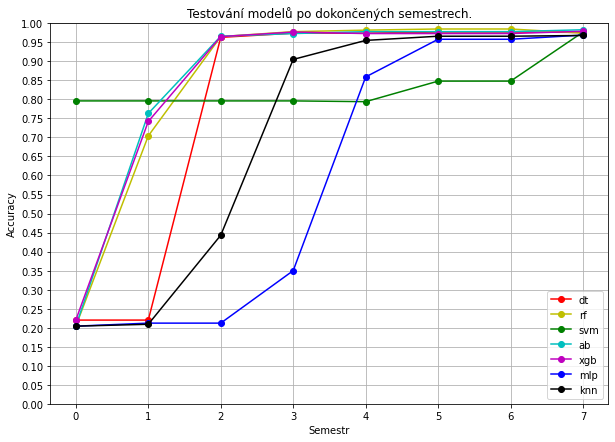

In [77]:
plt.figure(figsize=(10,7))
plt.grid(True)

xdt = results['dt'].index
ydt = results['dt'].values

xrf = results['rf'].index
yrf = results['rf'].values

xsvm = results['svm'].index
ysvm = results['svm'].values

xab = results['ab'].index
yab = results['ab'].values

xxgb = results['xgb'].index
yxgb = results['xgb'].values

xmlp = results['mlp'].index
ymlp = results['mlp'].values

xknn = results['knn'].index
yknn = results['knn'].values

y_values = np.arange(0.0, 1.05, 0.05)

plt.plot(xdt, ydt, '-o', color='r', label='dt')
plt.plot(xrf, yrf, '-o', color='y', label='rf')
plt.plot(xsvm, ysvm, '-o', color='g', label='svm')
plt.plot(xab, yab, '-o', color='c', label='ab')
plt.plot(xxgb, yxgb, '-o', color='m', label='xgb')
plt.plot(xmlp, ymlp, '-o', color='b', label='mlp')
plt.plot(xknn, yknn, '-o', color='k', label='knn')


plt.title('Testování modelů po dokončených semestrech.')

plt.yticks(y_values)
plt.xlabel('Semestr')
plt.ylabel('Accuracy')

plt.legend()

plt.ylim(ymin=0)
plt.ylim(ymax=1)

plt.show()

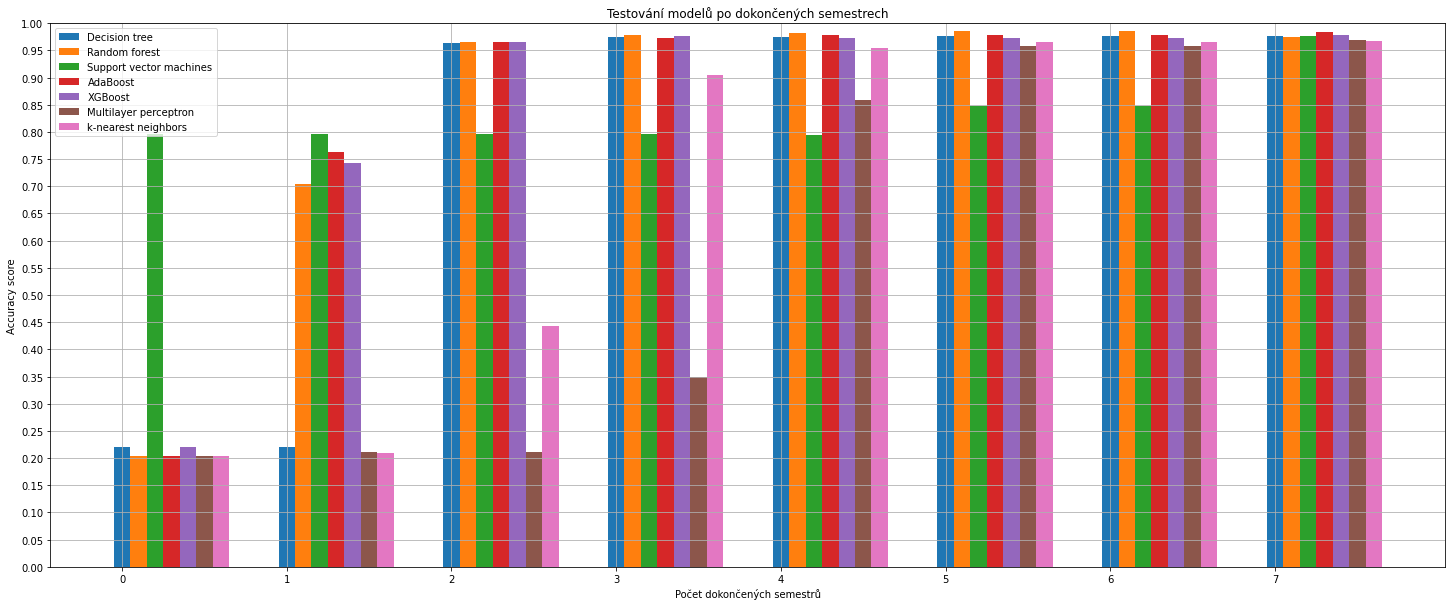

In [78]:
labels = np.array(results.index)

ydt = results['dt'].values

yrf = results['rf'].values

ysvm = results['svm'].values

yab = results['ab'].values

yxgb = results['xgb'].values

ymlp = results['mlp'].values

yknn = results['knn'].values

x = np.arange(len(labels))*2  # the label locations
width = 0.2  # the width of the bars


fig, ax = plt.subplots()
rects_dt = ax.bar(x , ydt, width, label='Decision tree')
rects_rf = ax.bar(x + width, yrf, width, label='Random forest')
rects_svm = ax.bar(x + width * 2, ysvm, width, label='Support vector machines')
rects_ab = ax.bar(x + width * 3, yab, width, label='AdaBoost')
rects_xgb = ax.bar(x + width * 4, yxgb, width, label='XGBoost')
rects_mlp = ax.bar(x + width * 5, ymlp, width, label='Multilayer perceptron')
rects_knn = ax.bar(x + width * 6, yknn, width, label='k-nearest neighbors')

y_values = np.arange(0.0, 1.05, 0.05)

ax.set_ylabel('Accuracy score')
ax.set_xlabel('Počet dokončených semestrů')
ax.set_title('Testování modelů po dokončených semestrech')
ax.set_xticks(x)
ax.set_xticklabels(labels)
plt.yticks(y_values)
ax.legend(loc='best')
ax.grid(True)

plt.ylim(ymin=0)
plt.ylim(ymax=1)

fig.set_size_inches(25,10)
plt.show()

In [79]:
results

dt     rf    svm     ab    xgb    mlp    knn
0   0.22  0.204  0.796  0.204   0.22  0.204  0.204
1   0.22  0.704  0.796  0.763  0.742  0.212  0.209
2  0.963  0.965  0.796  0.966  0.965  0.212  0.443
3  0.974  0.978  0.796  0.973  0.977   0.35  0.905
4  0.974  0.982  0.794  0.978  0.973  0.859  0.955
5  0.977  0.985  0.848  0.978  0.973  0.958  0.966
6  0.977  0.985  0.848  0.978  0.973  0.958  0.966
7  0.976  0.974  0.977  0.983  0.979  0.969  0.968

#### Po doplněni průměrem

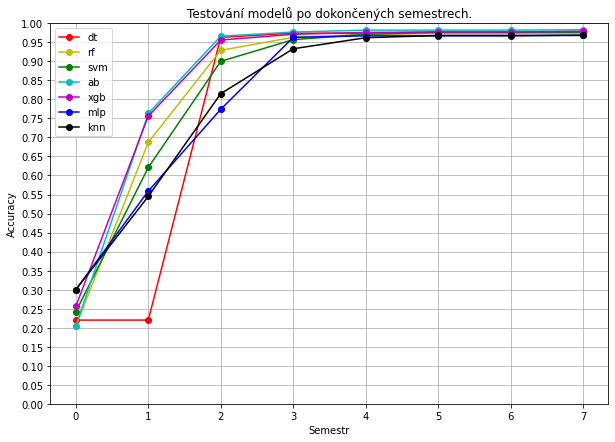

In [80]:
plt.figure(figsize=(10,7))
plt.grid(True)

xdt = results_mean['dt'].index
ydt = results_mean['dt'].values

xrf = results_mean['rf'].index
yrf = results_mean['rf'].values

xsvm = results_mean['svm'].index
ysvm = results_mean['svm'].values

xab = results_mean['ab'].index
yab = results_mean['ab'].values

xxgb = results_mean['xgb'].index
yxgb = results_mean['xgb'].values

xmlp = results_mean['mlp'].index
ymlp = results_mean['mlp'].values

xknn = results_mean['knn'].index
yknn = results_mean['knn'].values

y_values = np.arange(0.0, 1.05, 0.05)

plt.plot(xdt, ydt, '-o', color='r', label='dt')
plt.plot(xrf, yrf, '-o', color='y', label='rf')
plt.plot(xsvm, ysvm, '-o', color='g', label='svm')
plt.plot(xab, yab, '-o', color='c', label='ab')
plt.plot(xxgb, yxgb, '-o', color='m', label='xgb')
plt.plot(xmlp, ymlp, '-o', color='b', label='mlp')
plt.plot(xknn, yknn, '-o', color='k', label='knn')

plt.title('Testování modelů po dokončených semestrech.')

plt.yticks(y_values)
plt.xlabel('Semestr')
plt.ylabel('Accuracy')

plt.legend()

plt.ylim(ymin=0)
plt.ylim(ymax=1)

plt.show()

In [81]:
results_mean

dt     rf    svm     ab    xgb    mlp    knn
0   0.22  0.204  0.242  0.204  0.256    0.3    0.3
1   0.22  0.687  0.621  0.763  0.756  0.559  0.545
2  0.963  0.929    0.9  0.966  0.956  0.774  0.815
3  0.974  0.963  0.957  0.977  0.971  0.963  0.933
4  0.974  0.971  0.971  0.982  0.976  0.967  0.962
5  0.977  0.973  0.976  0.982  0.977  0.967  0.968
6  0.977  0.973  0.976  0.982  0.977  0.967  0.968
7  0.976  0.974  0.977  0.983  0.979  0.969  0.968

### Měřeno f1_score

In [82]:
x_test = {0:Xtest_0, 1:Xtest_1, 2:Xtest_2, 3:Xtest_3, 4:Xtest_4, 5:Xtest_5, 6:Xtest_6, 7:Xtest}
for i in range(0, 8):
    results_f1.loc[i, 'dt'] = round(metrics.f1_score(ytest, dt_f1.predict(x_test[i])), 3)
    results_f1.loc[i, 'rf'] = round(metrics.f1_score(ytest, rf_f1.predict(x_test[i])), 3)
    results_f1.loc[i, 'svm'] = round(metrics.f1_score(ytest, svc_f1.predict(x_test[i])), 3)
    results_f1.loc[i, 'ab'] = round(metrics.f1_score(ytest, ab_f1.predict(x_test[i])), 3)
    results_f1.loc[i, 'xgb'] = round(metrics.f1_score(ytest, xgb_f1.predict(x_test[i])), 3)
    results_f1.loc[i, 'mlp'] = round(metrics.f1_score(ytest, mlp.predict(x_test[i])), 3)
    results_f1.loc[i, 'knn'] = round(metrics.f1_score(ytest, knn.predict(x_test[i])), 3)

In [83]:
x_test_mean = {0:Xtest_0_mean, 1:Xtest_1_mean, 2:Xtest_2_mean, 3:Xtest_3_mean, 4:Xtest_4_mean, 5:Xtest_5_mean, 6:Xtest_6_mean, 7:Xtest}
for i in range(0, 8):
    results_mean_f1.loc[i, 'dt'] = round(metrics.f1_score(ytest, dt_f1.predict(x_test_mean[i])), 3)
    results_mean_f1.loc[i, 'rf'] = round(metrics.f1_score(ytest, rf_f1.predict(x_test_mean[i])), 3)
    results_mean_f1.loc[i, 'svm'] = round(metrics.f1_score(ytest, svc_f1.predict(x_test_mean[i])), 3)
    results_mean_f1.loc[i, 'ab'] = round(metrics.f1_score(ytest, ab_f1.predict(x_test_mean[i])), 3)
    results_mean_f1.loc[i, 'xgb'] = round(metrics.f1_score(ytest, xgb_f1.predict(x_test_mean[i])), 3)
    results_mean_f1.loc[i, 'mlp'] = round(metrics.f1_score(ytest, mlp.predict(x_test[i])), 3)
    results_mean_f1.loc[i, 'knn'] = round(metrics.f1_score(ytest, knn.predict(x_test[i])), 3)

#### Po doplnění 0

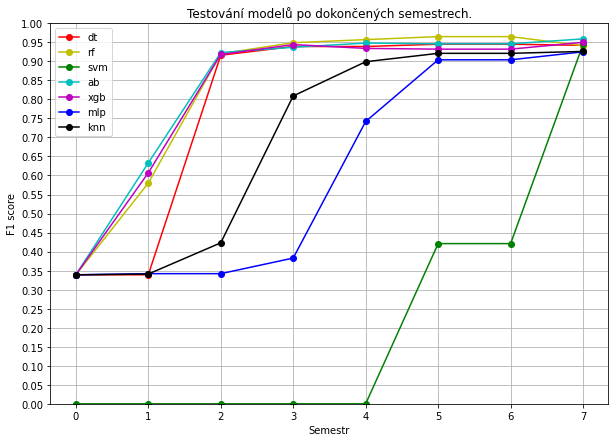

In [88]:
plt.figure(figsize=(10,7))
plt.grid(True)

xdt = results_f1['dt'].index
ydt = results_f1['dt'].values

xrf = results_f1['rf'].index
yrf = results_f1['rf'].values

xsvm = results_f1['svm'].index
ysvm = results_f1['svm'].values

xab = results_f1['ab'].index
yab = results_f1['ab'].values

xxgb = results_f1['xgb'].index
yxgb = results_f1['xgb'].values

xmlp = results_f1['mlp'].index
ymlp = results_f1['mlp'].values

xknn = results_f1['knn'].index
yknn = results_f1['knn'].values

y_values = np.arange(0.0, 1.05, 0.05)

plt.plot(xdt, ydt, '-o', color='r', label='dt')
plt.plot(xrf, yrf, '-o', color='y', label='rf')
plt.plot(xsvm, ysvm, '-o', color='g', label='svm')
plt.plot(xab, yab, '-o', color='c', label='ab')
plt.plot(xxgb, yxgb, '-o', color='m', label='xgb')
plt.plot(xmlp, ymlp, '-o', color='b', label='mlp')
plt.plot(xknn, yknn, '-o', color='k', label='knn')


plt.title('Testování modelů po dokončených semestrech.')

plt.yticks(y_values)
plt.xlabel('Semestr')
plt.ylabel('F1 score')

plt.legend()

plt.ylim(ymin=0)
plt.ylim(ymax=1)

plt.show()

In [85]:
results_f1

dt     rf    svm     ab    xgb    mlp    knn
0  0.339  0.339      0  0.339  0.339  0.339  0.339
1  0.339   0.58      0  0.633  0.607  0.342  0.341
2  0.916   0.92      0  0.923  0.918  0.342  0.423
3  0.939  0.949      0  0.937  0.944  0.383  0.809
4  0.939  0.957      0  0.948  0.934  0.742  0.899
5  0.945  0.965  0.421  0.946  0.932  0.904  0.921
6  0.945  0.965  0.421  0.946  0.932  0.904  0.921
7  0.942  0.941  0.945  0.959   0.95  0.925  0.926

#### Po doplněni průměrem

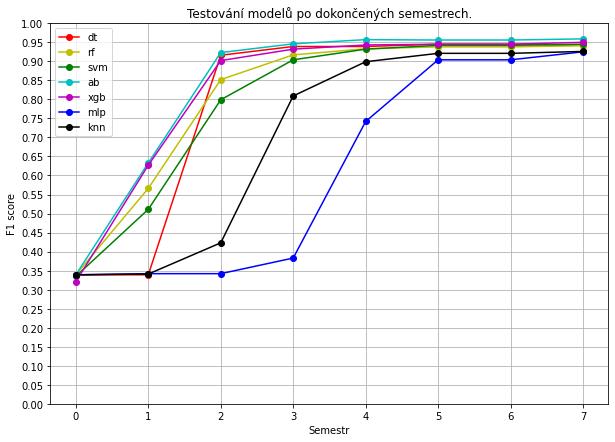

In [89]:
plt.figure(figsize=(10,7))
plt.grid(True)

xdt = results_mean_f1['dt'].index
ydt = results_mean_f1['dt'].values

xrf = results_mean_f1['rf'].index
yrf = results_mean_f1['rf'].values

xsvm = results_mean_f1['svm'].index
ysvm = results_mean_f1['svm'].values

xab = results_mean_f1['ab'].index
yab = results_mean_f1['ab'].values

xxgb = results_mean_f1['xgb'].index
yxgb = results_mean_f1['xgb'].values

xmlp = results_mean_f1['mlp'].index
ymlp = results_mean_f1['mlp'].values

xknn = results_mean_f1['knn'].index
yknn = results_mean_f1['knn'].values

y_values = np.arange(0.0, 1.05, 0.05)

plt.plot(xdt, ydt, '-o', color='r', label='dt')
plt.plot(xrf, yrf, '-o', color='y', label='rf')
plt.plot(xsvm, ysvm, '-o', color='g', label='svm')
plt.plot(xab, yab, '-o', color='c', label='ab')
plt.plot(xxgb, yxgb, '-o', color='m', label='xgb')
plt.plot(xmlp, ymlp, '-o', color='b', label='mlp')
plt.plot(xknn, yknn, '-o', color='k', label='knn')


plt.title('Testování modelů po dokončených semestrech.')

plt.yticks(y_values)
plt.xlabel('Semestr')
plt.ylabel('F1 score')

plt.legend()

plt.ylim(ymin=0)
plt.ylim(ymax=1)

plt.show()

In [87]:
results_mean_f1

dt     rf    svm     ab    xgb    mlp    knn
0  0.339  0.339  0.335  0.339  0.321  0.339  0.339
1  0.339  0.566  0.511  0.633  0.627  0.342  0.341
2  0.916  0.852  0.799  0.923  0.902  0.342  0.423
3  0.939  0.917  0.904  0.946  0.932  0.383  0.809
4  0.939  0.933  0.932  0.957  0.943  0.742  0.899
5  0.945  0.938  0.942  0.956  0.945  0.904  0.921
6  0.945  0.938  0.942  0.956  0.945  0.904  0.921
7  0.942  0.941  0.945  0.959   0.95  0.925  0.926